## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cupy as cp
from tomo_encoders.misc import viewer
from tomo_encoders import DataFile
from skimage.filters import threshold_otsu
from tomo_encoders.reconstruction.recon import recon_binning
import h5py

In [2]:
pixel_res = 1.17 # micrometer per pixel
b = 4
b_K = 4

In [3]:
def transform_ax2(img):
    img = np.fliplr(img)
    img = np.rot90(img)
    return img

In [4]:
hf = h5py.File('/data02/MyArchive/aisteer_3Dencoders/tmp_data/projs_2k.hdf5', 'r')
projs = np.asarray(hf["data"][:])
theta = np.asarray(hf['theta'][:])
center = float(np.asarray(hf["center"]))
hf.close()

In [5]:
Vx = recon_binning(projs, theta, center, b_K, b, blur_sigma = 0.5)    
thresh = cp.float32(threshold_otsu(Vx[::4,::4,::4].reshape(-1).get()))
Vp = (Vx < thresh).astype(cp.uint8).get()
Vx = Vx.get()

In [6]:
imx = viewer.get_orthoplanes(vol = Vx)
imp = viewer.get_orthoplanes(vol = Vp)

(-0.5, 543.5, 543.5, -0.5)

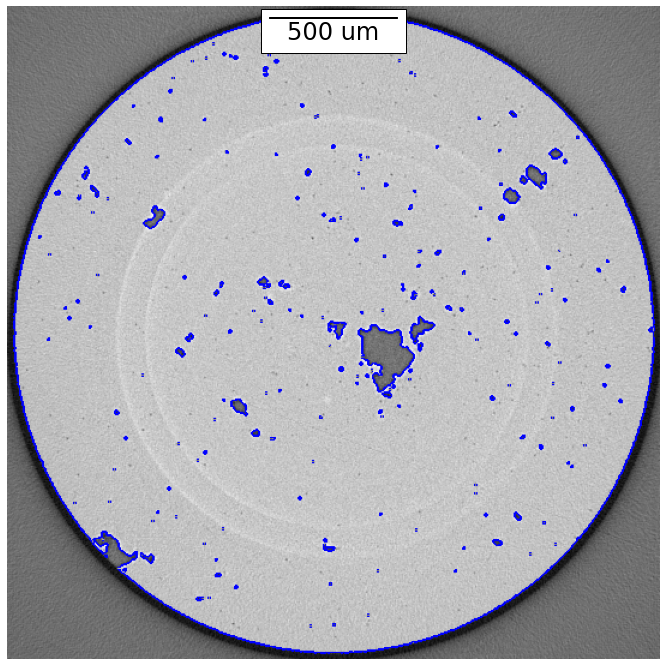

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[0], imp[0], ax, color =[0,0,255])
viewer.add_scalebar(ax, 500, 1.17*b, loc = 'upper center', fontsize = 24)
ax.axis('off')

<AxesSubplot:>

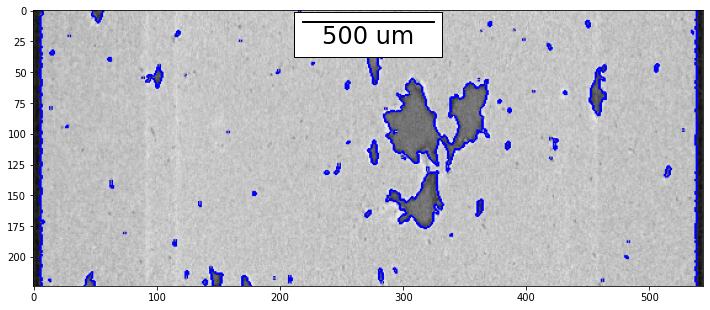

In [8]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[1], imp[1], ax, color =[0,0,255])
viewer.add_scalebar(ax, 500, 1.17*4, loc = 'upper center', fontsize = 24)
# ax.axis('off')

(-0.5, 223.5, 543.5, -0.5)

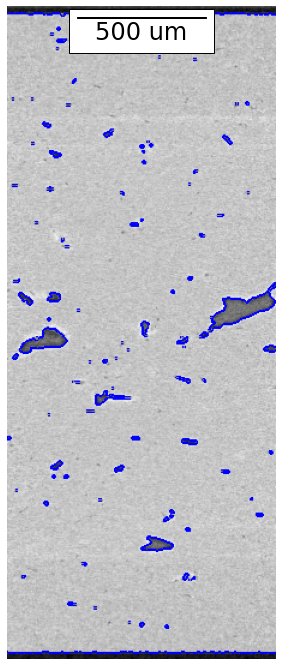

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(transform_ax2(imx[2]), transform_ax2(imp[2]), ax, color =[0,0,255])
viewer.add_scalebar(ax, 500, 1.17*4, loc = 'upper center', fontsize = 24)
ax.axis('off')

## TROUBLESHOOTING

<AxesSubplot:>

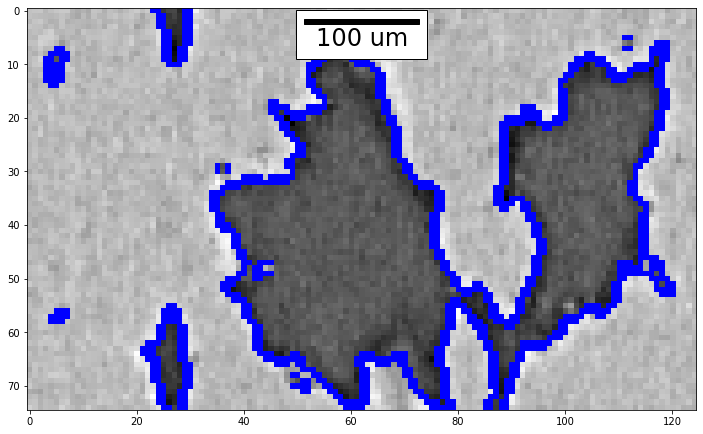

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[1][200//b:500//b,1000//b:1500//b], imp[1][200//b:500//b,1000//b:1500//b], ax, color =[0,0,255])
viewer.add_scalebar(ax, 100, 1.17*4, loc = 'upper center', fontsize = 24)
# ax.axis('off')

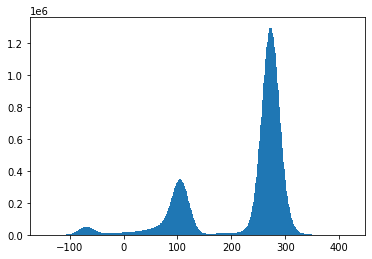

In [11]:
h = plt.hist(Vx.reshape(-1), bins = 500)

(-0.5, 124.5, 124.5, -0.5)

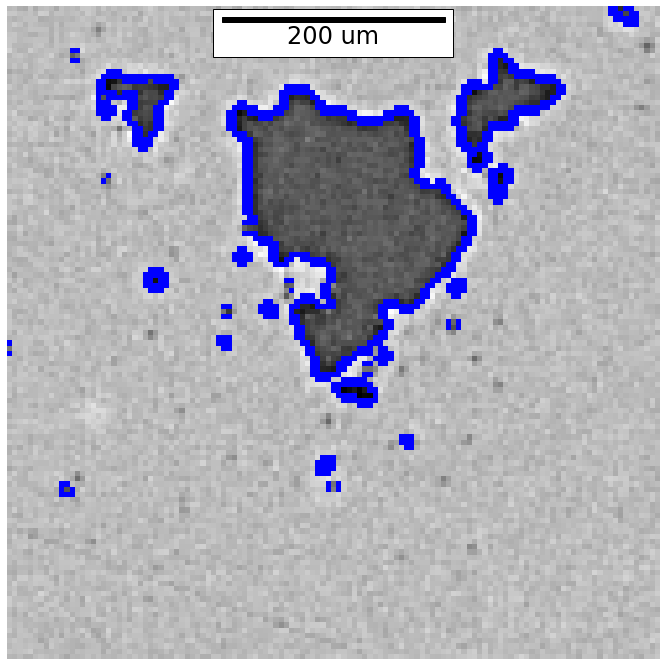

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[0][1000//b:1500//b,1000//b:1500//b], imp[0][1000//b:1500//b,1000//b:1500//b], ax, color =[0,0,255])
viewer.add_scalebar(ax, 200, 1.17*b, loc = 'upper center', fontsize = 24)
ax.axis('off')

<AxesSubplot:>

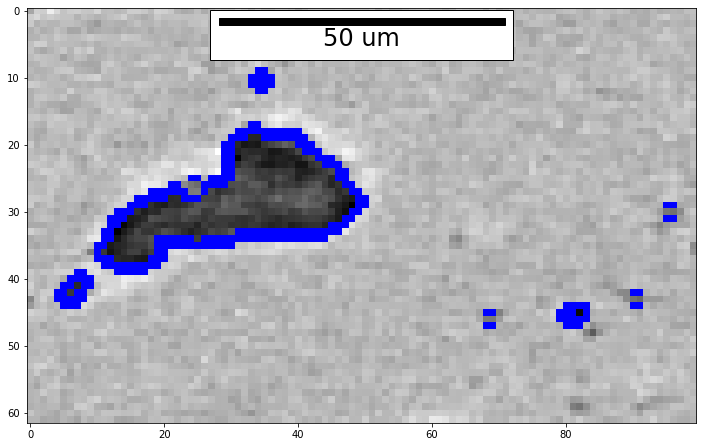

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(transform_ax2(imx[2][0:400//b,1000//b:1250//b]), transform_ax2(imp[2][0:400//b,1000//b:1250//b]), ax, color =[0,0,255])
viewer.add_scalebar(ax, 50, 1.17, loc = 'upper center', fontsize = 24)
# ax.axis('off')